In [162]:
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

def smooth_plot(data, *args, **kwargs):
    data = savgol_filter(data, 51, 3)
    plt.plot(data, *args, **kwargs)
    
def smooth_data(data):
    return savgol_filter(data, 51, 3)

in_mobility = pd.read_csv("region/2020_IN_Region_Mobility_Report.csv")
print(in_mobility.shape)
in_mobility = pd.concat([in_mobility,pd.read_csv("region/2021_IN_Region_Mobility_Report.csv")])
print(in_mobility.shape)

(212855, 15)
(282512, 15)


In [163]:
district_wise = pd.read_csv("districts.csv")
district_wise.drop(['Other','Recovered','Deceased','Tested'],axis=1,inplace=True)
district_wise = district_wise[district_wise['District']!='Unknown']
district_wise['Date'] = pd.to_datetime(district_wise['Date'])
district_wise = district_wise.sort_values(['District','Date'])#.diff()
district_wise['Confirmed'] = district_wise['Confirmed'].diff()
district_wise.sort_values(['Date','State'])
changes = district_wise.ne(district_wise.shift()).apply(lambda x: x.index[x].tolist())[2]
district_wise.loc[changes,'Confirmed'] = 0

In [164]:
district_wise.groupby(['Date','District']).first()

State  Confirmed
Date       District                              
2020-04-26 Agar Malwa   Madhya Pradesh        0.0
           Agra          Uttar Pradesh        0.0
           Ahmedabad           Gujarat        0.0
           Ahmednagar      Maharashtra        0.0
           Aizawl              Mizoram        0.0
...                                ...        ...
2021-04-22 Yadgir            Karnataka      111.0
           Yamunanagar         Haryana      179.0
           Yanam            Puducherry       40.0
           Yavatmal        Maharashtra     1685.0
           Zunheboto          Nagaland        0.0

[224806 rows x 2 columns]

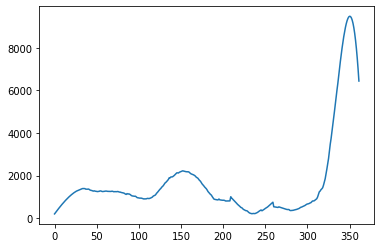

In [165]:
d1 = district_wise[district_wise['District']=='Mumbai']['Confirmed']
smooth_plot(d1)

In [166]:
in_mobility = in_mobility[['sub_region_2','date',
                           'retail_and_recreation_percent_change_from_baseline',
                           'grocery_and_pharmacy_percent_change_from_baseline',
                           'parks_percent_change_from_baseline',
                           'transit_stations_percent_change_from_baseline',
                           'workplaces_percent_change_from_baseline',
                           'residential_percent_change_from_baseline']]

in_mobility['date'] = pd.to_datetime(in_mobility['date'])

in_mobility = in_mobility[in_mobility['sub_region_2'].notna()]

in_mobility.columns = ['District', 'Date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']

In [167]:
in_mobility

,District,Date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
639,North and Middle Andaman,2020-03-01,NaN,NaN,-41.0,NaN,NaN,NaN
640,North and Middle Andaman,2020-03-08,NaN,NaN,-53.0,NaN,NaN,NaN
641,North and Middle Andaman,2020-03-09,NaN,NaN,NaN,NaN,-43.0,NaN
642,North and Middle Andaman,2020-03-10,NaN,NaN,NaN,NaN,-51.0,NaN
643,North and Middle Andaman,2020-03-15,NaN,NaN,-40.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
69652,West Medinipur,2021-04-10,-15.0,13.0,6.0,-9.0,-1.0,14.0
69653,West Medinipur,2021-04-11,-15.0,13.0,4.0,-8.0,1.0,14.0
69654,West Medinipur,2021-04-12,-15.0,20.0,18.0,-9.0,-5.0,13.0
69655,West Medinipur,2021-04-13,-17.0,14.0,13.0,-8.0,-10.0,14.0


In [168]:
district_wise#.set_index()

,Date,State,District,Confirmed
200,2020-04-26,Madhya Pradesh,Agar Malwa,0.0
616,2020-04-27,Madhya Pradesh,Agar Malwa,0.0
1041,2020-04-28,Madhya Pradesh,Agar Malwa,0.0
1471,2020-04-29,Madhya Pradesh,Agar Malwa,1.0
1905,2020-04-30,Madhya Pradesh,Agar Malwa,0.0
...,...,...,...,...
228872,2021-04-18,Nagaland,Zunheboto,0.0
229526,2021-04-19,Nagaland,Zunheboto,0.0
230180,2021-04-20,Nagaland,Zunheboto,0.0
230834,2021-04-21,Nagaland,Zunheboto,0.0


In [172]:
combined = pd.merge(in_mobility, district_wise, on=['Date','District'])

combined.to_csv('district_mobility_cases.csv', index=False)

In [173]:
combined[combined['District']=='Mumbai']

,District,Date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,State,Confirmed
64893,Mumbai,2020-04-26,-94.0,-70.0,-99.0,-90.0,-69.0,25.0,Maharashtra,0.0
64894,Mumbai,2020-04-27,-92.0,-69.0,-99.0,-92.0,-85.0,36.0,Maharashtra,369.0
64895,Mumbai,2020-04-28,-93.0,-70.0,-99.0,-92.0,-85.0,37.0,Maharashtra,393.0
64896,Mumbai,2020-04-29,-92.0,-69.0,-99.0,-91.0,-85.0,35.0,Maharashtra,475.0
64897,Mumbai,2020-04-30,-92.0,-68.0,-97.0,-92.0,-85.0,36.0,Maharashtra,417.0
...,...,...,...,...,...,...,...,...,...,...
154930,Mumbai,2021-04-10,-87.0,-62.0,-85.0,-77.0,-69.0,30.0,Maharashtra,9330.0
154931,Mumbai,2021-04-11,-85.0,-51.0,-84.0,-72.0,-46.0,20.0,Maharashtra,9986.0
154932,Mumbai,2021-04-12,-56.0,13.0,-61.0,-45.0,-42.0,15.0,Maharashtra,6893.0
154933,Mumbai,2021-04-13,-61.0,-2.0,-65.0,-57.0,-57.0,21.0,Maharashtra,7873.0
